# LAB 2: GRADIENT DESCENT PRINCIPLES

## 1. GRADIENT DESCENT METHODS

### 1.1: A SIMPLE QUADRATIC FUNCTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_contour_gradients(f, gradf, xr=(-50,50) ,yr=(-50,50), step=0.05):
    # Clear plot
    plt.clf()
    
    # Create a mesh grid and apply the function over all the pairs of points
    X = np.arange(*xr, step)
    Y = np.arange(*yr, step)
    X, Y = np.meshgrid(X, Y)
    
    XY = np.c_[X.ravel(), Y.ravel()]
    Z = np.apply_along_axis(f, 1, XY).reshape(X.shape)

    # Plot contour of the function
    plt.figure()
    plt.contour(X, Y, Z, 50)

    # Get the gradient for each pair of points
    grad=np.apply_along_axis(gradf, 1, XY)
    
    # Plot the gradient
    plt.streamplot(X, Y, grad[:, 0].reshape(X.shape), grad[:, 1].reshape(X.shape))
    
    plt.show()

In [3]:
def f(x):
    return x[0]**2 + x[1]**2

In [4]:
def gradf(x):
    return 2*x

<Figure size 432x288 with 0 Axes>

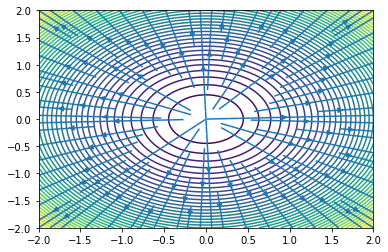

In [5]:
plot_contour_gradients(f, gradf, xr=(-2, 2.05), yr=(-2, 2.05))

In [6]:
def gradient_descent(x_0, gradf, alpha=0.1, n=100):
    x = x_0
    y = [x]
    
    for _ in range(n):
        x = x - alpha * gradf(x)
        y.append(x)
    return x, np.array(y)

In [7]:
x_0 = np.array([30, 40])
sol1, path_1 = gradient_descent(x_0, gradf)

x_0 = np.array([-12, 5])
sol2, path_2 = gradient_descent(x_0, gradf)

x_0=np.array([0,-40])
sol3, path_3 = gradient_descent(x_0, gradf)

paths = [path_1, path_2, path_3]
points = [sol1, sol2, sol3]

In [8]:
def plot_paths(f, paths, xr=(-50,50), yr=(-50,50), step=0.05):
    # Clear plot
    plt.clf()
    
    # Create a mesh grid and apply the function over all the pairs of points
    X = np.arange(*xr, step)
    Y = np.arange(*yr, step)
    X, Y = np.meshgrid(X, Y)
    
    XY = np.c_[X.ravel(), Y.ravel()]
    Z = np.apply_along_axis(f, 1, XY).reshape(X.shape)

    # Plot contour of the function
    plt.figure()
    plt.contour(X, Y, Z, 50)
    
    for path in paths:
        plt.plot(path[:, 0], path[:, 1], 'o-')
    

    plt.show()

    
def print_final_points(points, n_iters=[]):
    if len(n_iters):
        for p, i in zip(points, n_iters):
            print(f'Num. iterations: {i}\tFinal point: {p}')
    else:
        for p in points:
            print(f'Final point: {p}')

<Figure size 432x288 with 0 Axes>

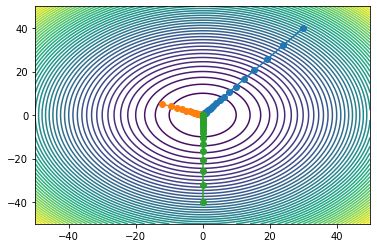

In [9]:
plot_paths(f, paths)

In [10]:
print_final_points(points)

Final point: [6.11110793e-09 8.14814391e-09]
Final point: [-2.44444317e-09  1.01851799e-09]
Final point: [ 0.00000000e+00 -8.14814391e-09]


Now, we will change the step size, choose a bigger one and see what happens.

In [11]:
x_0 = np.array([30, 40])
sol1, path_1 = gradient_descent(x_0, gradf, 1)

x_0 = np.array([-12, 5])
sol2, path_2 = gradient_descent(x_0, gradf, 1)

x_0=np.array([0,-40])
sol3, path_3 = gradient_descent(x_0, gradf, 1)

paths = [path_1, path_2, path_3]
points = [sol1, sol2, sol3]

<Figure size 432x288 with 0 Axes>

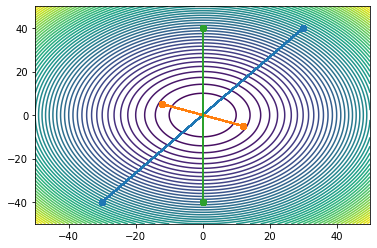

In [12]:
plot_paths(f, paths)

In [13]:
print_final_points(points)

Final point: [30 40]
Final point: [-12   5]
Final point: [  0 -40]


In [14]:
x_0 = np.array([30, 40])
sol1, path_1 = gradient_descent(x_0, gradf, 2)

x_0 = np.array([-12, 5])
sol2, path_2 = gradient_descent(x_0, gradf, 2)

x_0=np.array([0,-40])
sol3, path_3 = gradient_descent(x_0, gradf, 2)

paths = [path_1, path_2, path_3]
points = [sol1, sol2, sol3]

<Figure size 432x288 with 0 Axes>

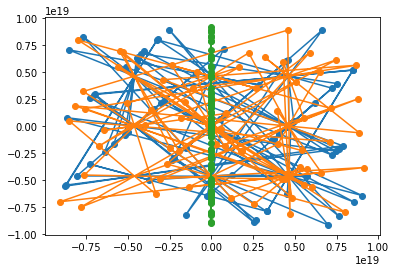

In [15]:
plot_paths(f, paths)

In [16]:
print_final_points(points)

Final point: [ 2695035002421400190 -8704449379244500824]
Final point: [-1078014000968560076  3523629846021825301]
Final point: [                  0 8704449379244500824]


### 1.2: A MORE COMPLEX FUNCTION

In [17]:
def f(x):
    return (x[0]**2)*(4-2.1*x[0]**2+1/3*x[0]**4)+x[0]*x[1]+(-1+x[1]**2)*4*x[1]**2

In [18]:
def gradf(x):
    return np.array([8*x[0] - 8.4*x[0]**3 + 2*x[0]**5 + x[1], x[0] - 8*x[1] + 16*x[1]**3])

<Figure size 432x288 with 0 Axes>

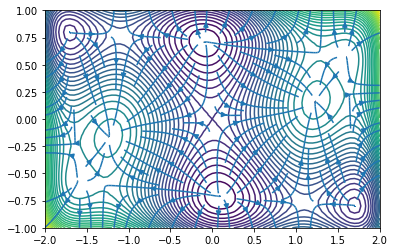

In [19]:
plot_contour_gradients(f,gradf,(-2,2.05),(-1,1.05))

In [20]:
x_0 = np.array([0, 0])
sol1, path_1 = gradient_descent(x_0, gradf)

x_0 = np.array([0, 0.5])
sol2, path_2 = gradient_descent(x_0, gradf)

x_0=np.array([0,-0.5])
sol3, path_3 = gradient_descent(x_0, gradf)

x_0 = np.array([1.25, -0.5])
sol4, path_4 = gradient_descent(x_0, gradf)

x_0=np.array([1.25,0.25])
sol5, path_5 = gradient_descent(x_0, gradf)

x_0=np.array([-1,0.4])
sol6, path_6 = gradient_descent(x_0, gradf)

x_0=np.array([-1.75,0.5])
sol7, path_7 = gradient_descent(x_0, gradf)

x_0=np.array([-0.6,-0.5])
sol8, path_8 = gradient_descent(x_0, gradf)

x_0=np.array([0.6,-0.25])
sol9, path_9 = gradient_descent(x_0, gradf)

paths = [path_1, path_2, path_3, path_4, path_5, path_6, path_7, path_8, path_9]
points = [sol1, sol2, sol3, sol4, sol5, sol6, sol7, sol8, sol9]

<Figure size 432x288 with 0 Axes>

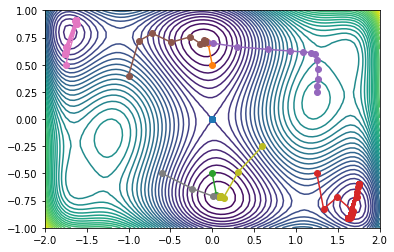

In [21]:
plot_paths(f, paths, xr=(-2,2.05), yr=(-1,1.05))

In [22]:
print_final_points(points)

Final point: [0. 0.]
Final point: [-0.08984201  0.7126564 ]
Final point: [ 0.08984201 -0.7126564 ]
Final point: [ 1.75451546 -0.59562251]
Final point: [-0.08984201  0.7126564 ]
Final point: [-0.08984201  0.7126564 ]
Final point: [-1.75451546  0.59562251]
Final point: [ 0.08984201 -0.7126564 ]
Final point: [ 0.08984201 -0.7126564 ]


In [23]:
def adapting_gradient_descent(x_0, f, gradf, tol=1e-5):
    n = 0
    x = x_0
    y = [x]
    alpha = 1
    
    while np.linalg.norm(gradf(x)) >= tol:
        alpha = 1
        
        while f(x - alpha * gradf(x)) - f(x) >= 0:
            alpha = alpha / 2
        
        n = n + 1
        x = x - alpha * gradf(x)
        y.append(x)
    
    return x, np.array(y), n

In [24]:
x_0=np.array([1.25,-0.25])
sol0, path_0, n= adapting_gradient_descent(x_0, f, gradf)

<Figure size 432x288 with 0 Axes>

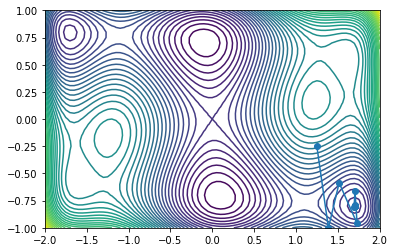

In [25]:
plot_paths(f, [path_0],(-2,2.05),(-1,1.05))

In [26]:
print_final_points([sol0], [n])

Num. iterations: 18	Final point: [ 1.70360677 -0.79608338]


In [27]:
x_0 = np.array([0, 0])
sol1, path_1, n1 = adapting_gradient_descent(x_0, f, gradf)

x_0 = np.array([0, 0.5])
sol2, path_2, n2 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([0,-0.5])
sol3, path_3, n3 = adapting_gradient_descent(x_0, f, gradf)

x_0 = np.array([1.25, -0.5])
sol4, path_4, n4 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([1.25,0.25])
sol5, path_5, n5 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([-1,0.4])
sol6, path_6, n6 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([-1.75,0.5])
sol7, path_7, n7 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([-0.6,-0.5])
sol8, path_8, n8 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([0.6,-0.25])
sol9, path_9, n9 = adapting_gradient_descent(x_0, f, gradf)

paths = [path_1, path_2, path_3, path_4, path_5, path_6, path_7, path_8, path_9]
points = [sol1, sol2, sol3, sol4, sol5, sol6, sol7, sol8, sol9]
n_iters = [n1, n2, n3, n4, n5, n6, n7, n8, n9]

<Figure size 432x288 with 0 Axes>

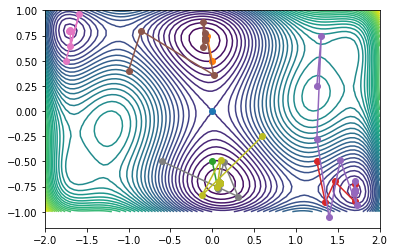

In [28]:
plot_paths(f, paths, xr=(-2,2.05), yr=(-1,1.05))

In [29]:
print_final_points(points, n_iters)

Num. iterations: 0	Final point: [0 0]
Num. iterations: 8	Final point: [-0.08984193  0.7126562 ]
Num. iterations: 8	Final point: [ 0.08984193 -0.7126562 ]
Num. iterations: 18	Final point: [ 1.70360678 -0.79608335]
Num. iterations: 20	Final point: [ 1.70360678 -0.79608334]
Num. iterations: 11	Final point: [-0.08984157  0.71265646]
Num. iterations: 15	Final point: [-1.70360663  0.79608386]
Num. iterations: 10	Final point: [ 0.08984197 -0.71265588]
Num. iterations: 10	Final point: [ 0.08984193 -0.71265615]


### 1.3: THE ROSENBROCK FUNCTION

In [30]:
def f_rosenbrock(x):
    return (1-x[0])**2+100*(x[1]-x[0]**2)**2

In [31]:
def gradf_rosenbrock(x):
    return np.array([-2*(1-x[0])-400*(x[1]-x[0]**2)*x[0],200*(x[1]-x[0]**2)])

<Figure size 432x288 with 0 Axes>

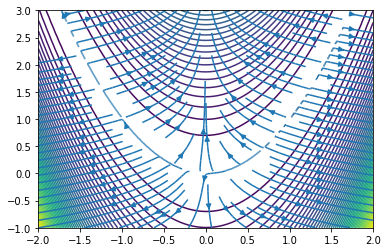

In [32]:
plot_contour_gradients(f_rosenbrock, gradf_rosenbrock, xr=(-2,2.05), yr=(-1, 3.05))

In [33]:
points = []
paths = []
n_iters = []

rosenbrock_initial_points = np.array([[0.0, 0.0], [0.0, 1.5], [1.5, 0], [0.5, 2.0], [-1.5, 0], [-0.5, 2.0]])

for x_0 in rosenbrock_initial_points:
    final_p, path, n_iter = adapting_gradient_descent(x_0, f_rosenbrock, gradf_rosenbrock)
    
    points.append(final_p)
    paths.append(path)
    n_iters.append(n_iter)

<Figure size 432x288 with 0 Axes>

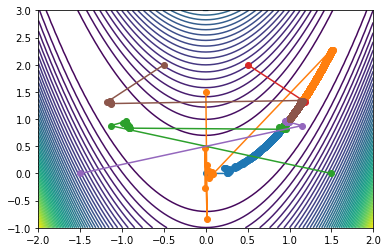

In [34]:
plot_paths(f_rosenbrock, paths, xr=(-2,2.05), yr=(-1, 3.05))

In [35]:
print_final_points(points, n_iters)

Num. iterations: 11980	Final point: [0.99999218 0.99998434]
Num. iterations: 13650	Final point: [1.00000781 1.00001566]
Num. iterations: 11108	Final point: [0.99999221 0.99998438]
Num. iterations: 10514	Final point: [1.0000078  1.00001564]
Num. iterations: 9859	Final point: [0.99999226 0.99998447]
Num. iterations: 10430	Final point: [1.00000785 1.00001574]


## 2. NEWTON DESCENT METHOD

### 2.1: A SIMPLE QUADRATIC FUNCTION

In [36]:
def f(x):
    return 100*x[0]**2+x[1]**2

In [37]:
def gradf(x):
    return np.array([200*x[0],2*x[1]])

In [38]:
def hessf(x):
    return np.array([[200,0],[0,2]])

We will first try the gradient descent algorithm from before, with tolerance 0.001. Then, we will lower it and see what happens (since it fails otherwise).

In [39]:
x_0 = np.array([-20, 0])
sol1, path_1, n1 = adapting_gradient_descent(x_0, f, gradf)

x_0 = np.array([14, 40])
sol2, path_2, n2 = adapting_gradient_descent(x_0, f, gradf)

paths = [path_1, path_2]
points = [sol1, sol2]
n_iters = [n1, n2]

<Figure size 432x288 with 0 Axes>

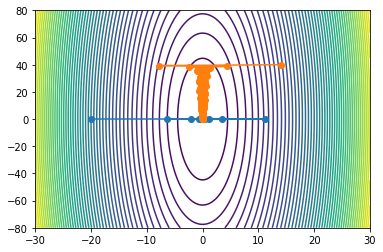

In [40]:
plot_paths(f, paths, xr=(-30,30.05), yr=(-80,80.05))

In [41]:
print_final_points(points, n_iters)

Num. iterations: 35	Final point: [3.591852e-08 0.000000e+00]
Num. iterations: 723	Final point: [-3.17076726e-08  3.85829819e-06]


In [42]:
x_0 = np.array([-20, 0])
sol1, path_1, n1 = adapting_gradient_descent(x_0, f, gradf, 1e-7)

x_0 = np.array([14, 40])
sol2, path_2, n2 = adapting_gradient_descent(x_0, f, gradf, 1e-7)

paths = [path_1, path_2]
points = [sol1, sol2]
n_iters = [n1, n2]

<Figure size 432x288 with 0 Axes>

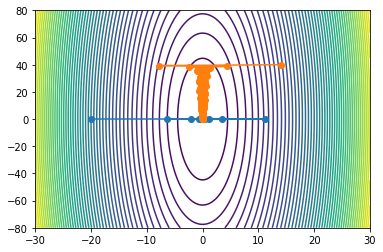

In [43]:
plot_paths(f, paths, xr=(-30,30.05), yr=(-80,80.05))

In [44]:
print_final_points(points, n_iters)

Num. iterations: 43	Final point: [3.59996806e-10 0.00000000e+00]
Num. iterations: 932	Final point: [3.13573913e-10 3.56783898e-08]


In [45]:
def newton_method(x_0, f, gradf, hessf, tol=1e-5):
    # Initial data
    x = x_0
    y = [x]
    n = 0
    alpha = 1
    
    # Following steps
    while np.linalg.norm(gradf(x)) >= tol:
        alpha = 1
        d = np.linalg.solve(hessf(x), -gradf(x))
        
        while f(x + alpha * d)- f(x) >= 0:
            alpha = alpha / 2
        
        n = n + 1
        x = x + alpha * d
        y.append(x)
    

    return x, np.array(y), n    

In [46]:
x_0 = np.array([-20, 0])
sol1, path_1, n1 = newton_method(x_0, f, gradf, hessf)

x_0 = np.array([14, 40])
sol2, path_2, n2 = newton_method(x_0, f, gradf, hessf)

paths = [path_1, path_2]
points = [sol1, sol2]
n_iters = [n1, n2]

<Figure size 432x288 with 0 Axes>

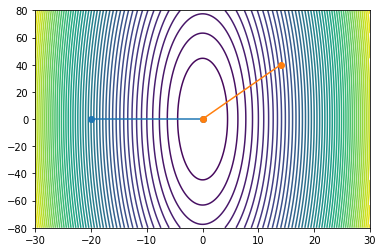

In [47]:
plot_paths(f, paths, xr=(-30,30.05), yr=(-80,80.05))

In [48]:
print_final_points(points, n_iters)

Num. iterations: 1	Final point: [0. 0.]
Num. iterations: 1	Final point: [0. 0.]


### 2.2: A MORE COMPLEX FUNCTION

In [49]:
def f(x):
    return (x[0]**2)*(4-2.1*x[0]**2+1/3*x[0]**4)+x[0]*x[1]+(-1+x[1]**2)*4*x[1]**2

In [50]:
def gradf(x):
    return np.array([8*x[0] - 8.4*x[0]**3 + 2*x[0]**5 + x[1], x[0] - 8*x[1] + 16*x[1]**3])

In [51]:
def hessf(x):
    return np.array([[8 - 25.2*x[0]**2 + 10*x[0]**4, 1], [1, -8 + 48*x[1]**2]])

Using pure gradient descent

In [52]:
x_0=np.array([-1,0.4])
sol, path, n = adapting_gradient_descent(x_0, f, gradf)

<Figure size 432x288 with 0 Axes>

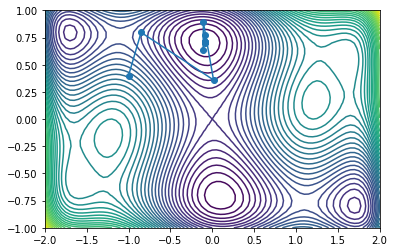

In [53]:
plot_paths(f, [path], xr=(-2,2.05), yr=(-1,1.05))

In [54]:
print_final_points([sol], [n])

Num. iterations: 11	Final point: [-0.08984157  0.71265646]


Using the Newton-gradient descent method

In [55]:
def combined_newton_gd(x_0, f, gradf, hessf, tol=1e-5):
    n = 0
    x = x_0
    path = [x]
    alpha = 1
    method = [0]
    
    while np.linalg.norm(gradf(x)) >= tol:
        alpha = 1
        n = n+1
        lambda1, lambda2 = np.linalg.eigvals(hessf(x))
        
        if lambda1 > 0 and lambda2 > 0:
            d = np.linalg.solve(hessf(x), -gradf(x))
            
            while f(x + alpha * d) - f(x) >= 0:
                alpha = alpha / 2
            
            x = x + alpha * d
            method.append(0)
        else:
            while f(x - alpha * gradf(x)) - f(x) >= 0:
                alpha = alpha / 2
            
            x = x - alpha * gradf(x)
            method.append(1)
        
        path.append(x)
    
    method[0] = method[1]    
    
    return x, np.array(path), np.array(method), n

In [56]:
x_0=np.array([-1,0.4])
sol, path, method, n = combined_newton_gd(x_0, f, gradf, hessf)

In [57]:
def plot_combined_path(f, path, method, xr=(-2, 2.05), yr=(-1, 1.05), step=0.05):
    # Clear plot
    plt.clf()
    
    # Create a mesh grid and apply the function over all the pairs of points
    X = np.arange(*xr, step)
    Y = np.arange(*yr, step)
    X, Y = np.meshgrid(X, Y)
    
    XY = np.c_[X.ravel(), Y.ravel()]
    Z = np.apply_along_axis(f, 1, XY).reshape(X.shape)

    # Plot contour of the function
    plt.figure()
    plt.contour(X, Y, Z, 50)
    
    start_idx = 0
    i = 0
    newton = []
    gradient = []
    
    while i < len(method):
        current_method = method[start_idx]
        
        while i < len(method) and current_method == method[i]:
            i += 1
        
        if current_method == 0:
            newton.append(path[max(start_idx - 1, 0):i])
        else:
            gradient.append(path[max(start_idx - 1, 0):i])
        
        start_idx = i
    
    for n in newton:
        plt.plot(n[:, 0], n[:, 1], 'bo-', label='Newton method')
    
    for g in gradient:
        plt.plot(g[:, 0], g[:, 1], 'ro-', label='Gradient descent')
    
    plt.legend()
    plt.show()    

<Figure size 432x288 with 0 Axes>

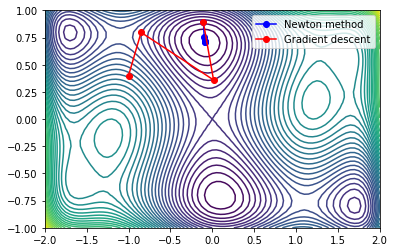

In [58]:
plot_combined_path(f, path, method, xr=(-2,2.05), yr=(-1,1.05))

In [59]:
print_final_points([sol], [n])

Num. iterations: 7	Final point: [-0.08984201  0.7126564 ]


## 2.3: THE ROSENBROCK FUNCTION

In [60]:
def hessf_rosenbrock(x):
    return np.array([[2 - 400*x[1] + 1200 * x[0] ** 2, -400 * x[0]], [-400 * x[0], 200]])

In [61]:
points = []
paths = []
methods = []
n_iters = []

rosenbrock_initial_points = np.array([[0.0, 0.0], [0.0, 1.5], [1.5, 0], [0.5, 2.0], [-1.5, 0], [-0.5, 2.0]])

for x_0 in rosenbrock_initial_points:
    final_p, path, method, n_iter = combined_newton_gd(x_0, f_rosenbrock, gradf_rosenbrock, hessf_rosenbrock)
    
    points.append(final_p)
    paths.append(path)
    methods.append(method)
    n_iters.append(n_iter)

<Figure size 432x288 with 0 Axes>

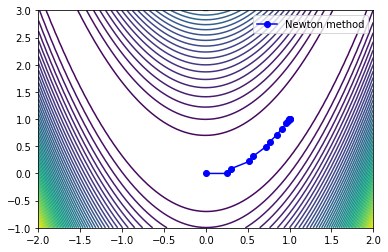

<Figure size 432x288 with 0 Axes>

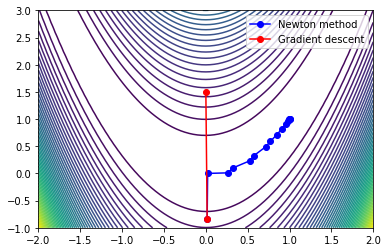

<Figure size 432x288 with 0 Axes>

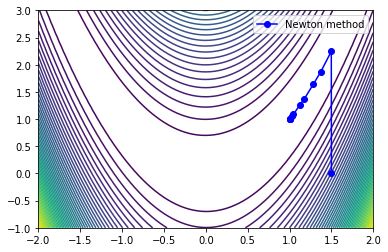

<Figure size 432x288 with 0 Axes>

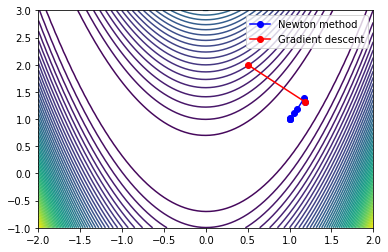

<Figure size 432x288 with 0 Axes>

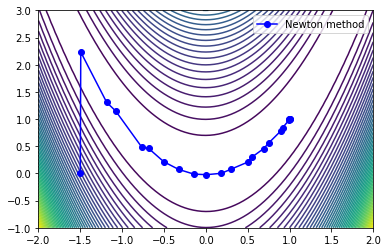

<Figure size 432x288 with 0 Axes>

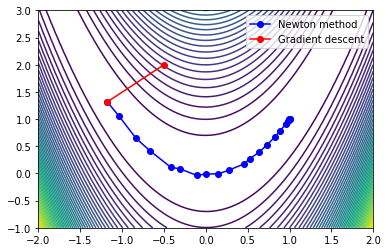

In [62]:
for path, method in zip(paths, methods):
    plot_combined_path(f_rosenbrock, path, method, xr=(-2,2.05), yr=(-1, 3.05))

In [63]:
print_final_points(points, n_iters)

Num. iterations: 13	Final point: [0.99999998 0.99999995]
Num. iterations: 15	Final point: [0.99999997 0.99999994]
Num. iterations: 11	Final point: [1. 1.]
Num. iterations: 8	Final point: [1.00000006 1.00000012]
Num. iterations: 21	Final point: [0.99999999 0.99999998]
Num. iterations: 21	Final point: [0.99999992 0.99999983]
